# Proof of Work

The challenge of blockchain is that we need something that is **difficult to compute** and easy to verify. This assymetry is what makes the problem more challenging. Here we introduce proof of work. The fact that it is difficult to compute a **proof of work** is what makes it harder for people to create their own fake blockchain.

The idea of proof of work is to have a task which is difficult to do and ideally one that has a scalable level of difficulty (if only one machine is working on proof of work it is easy, if many are it can be made more difficult as to keep the rate of difficult problems solved -> bitcoins mined, constant).

One example of a proof of work is finding the prime factors of large integers. For example, what are the prime factors of 969? Working that out will take a while. However if I present you with an answer you can very quickly verify that it is a correct answer:

In [1]:
3 * 17 * 19

969

For the proof of work used in our blockchain we also want to be able to increase the difficulty. This way as more people join the blockchain we can keep the rate at which blocks are mined roughly constant.

Our proof of work will be finding the hash of a transaction that ends with three zeros. As hashing a fixed input will always result in the same output, we will also add an integer to each record of a transaction and keep increasing it until the value of the hash function is what we are looking for.

These are our transactions from earlier:

In [2]:
transactions = [
    {'date': '2017-12-12', 'content': 'Tim pays Joel $3', 'nonce': 0},
    {'date': '2017-12-13', 'content': 'Joel pays Kevin $1.5', 'nonce': 0},
    {'date': '2017-12-13', 'content': 'Tim pays Joel $3', 'nonce': 0},
]

Next is our function that solves the proof of work problem. To stick with the bitcoin terminoligy we call it `mine`. As in mining a new block.

We pass it a transaction, and how many trailing zeros we want our hash value to have:

In [3]:
import json
import hashlib


def mine(transaction, trailing_zeros=3):
    h = ''
    while not h.endswith('0' * trailing_zeros):
        transaction['nonce'] += 1
        transaction_string = json.dumps(transaction, sort_keys=True).encode()
        h = hashlib.sha256(transaction_string).hexdigest()[-8:]

    transaction['hash'] = h
    return transaction

In [4]:
mine(transactions[0])

{'content': 'Tim pays Joel $3',
 'date': '2017-12-12',
 'hash': 'a3137000',
 'nonce': 2878}

That was not a difficult enough problem and so we need to make it more challenging so it takes longer. So now we try having the last 5 digits end in 0

In [5]:
mine(transactions[0], trailing_zeros=5)

{'content': 'Tim pays Joel $3',
 'date': '2017-12-12',
 'hash': '48100000',
 'nonce': 252008}

# Timing

We now have a proof of work algorithm where we can control the difficulty of the problem. Let's make a plot of how the computation time changes when we increase the number of trailing zeros we require.

In [6]:
from time import time


times = []

for n in range(6):
    tic = time()

    # average over our three transactions
    for transaction in transactions:
        mine(transaction, trailing_zeros=n)

    toc = time()
    times.append((toc - tic) / 3)

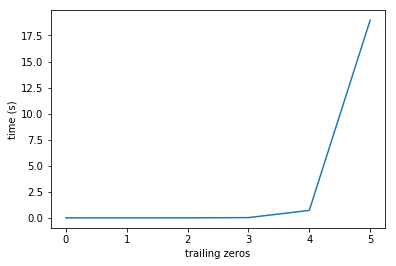

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.plot(times)
plt.xlabel("trailing zeros")
plt.ylabel("time (s)");